In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
from Landscape import Landscape
import numpy as np
# Test Example
import time
t0 = time.time()
N = 10
K = 1
state_num = 4
np.random.seed(1000)
landscape = Landscape(N=N, K=K, state_num=state_num, norm="MaxMin", alpha=0.25)
landscape.describe()
t1 = time.time()
print(time.strftime("%H:%M:%S", time.gmtime(t1-t0)))

LandScape shape of N=10, K=1
Influential Matrix: 
 [[1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]]
Influential Dependency Map:  [[6], [2], [9], [5], [8], [1], [0], [3], [2], [7]]
Cache Samples:
AAAAAAAAAA 0.8060128675745063
0000000000 0.8313647226173116
00:00:08


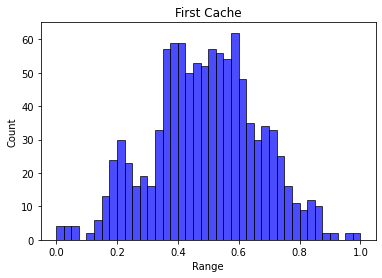

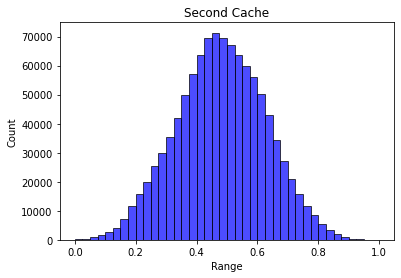

In [3]:
import matplotlib.pyplot as plt

plt.hist(landscape.first_cache.values(), bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
plt.title("First Cache")
plt.xlabel("Range")
plt.ylabel("Count")
plt.show()

plt.hist(landscape.second_cache.values(), bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
plt.title("Second Cache")
plt.xlabel("Range")
plt.ylabel("Count")
plt.show()

In [5]:
# Local Optima
# landscape.create_first_fitness_rank()
# landscape.create_second_fitness_rank()
landscape.count_first_local_optima()
landscape.count_second_local_optima()
first_ave_distance = landscape.calculate_first_avg_fitness_distance()
first_ave_distance = round(first_ave_distance, 4)
second_ave_distance = landscape.calculate_second_avg_fitness_distance()
second_ave_distance = round(second_ave_distance, 4)
print(landscape.first_local_optima)
print("Number of Local Optima: ", len(landscape.first_local_optima.keys()))
print("First Average Distance: ", first_ave_distance)
print("Second Average Distance: ", second_ave_distance)

AttributeError: 'Landscape' object has no attribute 'count_first_local_optima'

In [7]:
def get_first_neighbor_list(key: str) -> list:
    """
    This is also for the Coarse Landscape
    :param key: string from the coarse landscape cache dict, e.g., "AABB"
    :return:list of the neighbor state, e.g., [["0", "0", "1", "2"], ["0", "0", "1", "3"]]
    """
    neighbor_states = []
    for i, char in enumerate(key):
        for bit in ["A", "B"]:
            if bit != char:
                new_state = key[:i] + str(bit) + key[i + 1:]
                neighbor_states.append(new_state)
    return neighbor_states

state = "AABB"
neighbors = get_first_neighbor_list(key=state)
print(neighbors)

['BABB', 'ABBB', 'AAAB', 'AABA']
